# Récupération des données pour l'étude départementale

## 1- Importation des librairies externes et classiques

In [37]:
# Importation des librairies externes
!pip install git+https://github.com/InseeFrLab/Py-Insee-Data@master --ignore-install PyYAML
!pip install python-Levenshtein
!pip install openpyxl
#### Visualisation des donnees manquantes
!pip install missingno

  Cloning https://github.com/InseeFrLab/Py-Insee-Data (to revision master) to /tmp/pip-req-build-whkdk_ck
  Running command git clone --filter=blob:none -q https://github.com/InseeFrLab/Py-Insee-Data /tmp/pip-req-build-whkdk_ck
  Resolved https://github.com/InseeFrLab/Py-Insee-Data to commit 52139da402bc33da6b8892d7d3208f1d2ddfaa02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyYAML-6.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (661 kB)
  Using cached pandas-1.3.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
     |████████████████████████████████| 63 kB 1.2 MB/s            
  Using cached Unidecode-1.3.2-py3-none-any.whl (235 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached pathlib2-2.3.6-py2.py3-none-any.whl (17 kB)
  Using

In [2]:
# Importation des librairies 
import requests
import pandas as pd
import pynsee
import pynsee.download
from pynsee.sirene import *
import time
from tqdm import tqdm
from pynsee.utils.init_conn import init_conn
import os
from zipfile import ZipFile, Path
import io
import numpy as np

In [3]:
# token API insee
init_conn(insee_key=os.environ['INSEE_KEY'], insee_secret=os.environ['INSEE_SECRET'])

## 2- Téléchargement des données de SIRENE

In [4]:
### Téléchargement des données Sirene sur les établissements Siret de boucherie-charcuterie (code 4722Z) à l'instant T
# Téléchargement via Insee sirene data  by sirene.fr website

session = requests.session()
URL_ACCUEIL = "https://www.sirene.fr/sirene/public/creation-fichier"
URL_REQUETE_POST = "https://www.sirene.fr/sirene/public/verifier-creation-fichier.action"
URL_DEVIS="https://www.sirene.fr/sirene/client//sirene/client/devis-demande.action"

URL_RECAP="https://www.sirene.fr/sirene/client/telechargement-pret-fichier.action"
URL_TELECHARGEMENT_POST="https://www.sirene.fr/sirene/client/telechargement-fichier"
POST_DATA={
'fichier.caracteristiques.etat.actif': 'true',
'__checkbox_fichier.caracteristiques.etat.actif': 'true',
'__checkbox_fichier.caracteristiques.etat.ferme': 'true',
'fichier.caracteristiques.typeEtablissement': '1',
'fichier.caracteristiques.geoFile': 'false',
'fichier.caracteristiques.cjFile': 'false',
'fichier.caracteristiques.apeFile': 'false',
'fichier.caracteristiques.sirenSiretFile': 'false',
'fichiersCriteres.criteresGeographie.upload': '(binaire)',
'__multiselect_fichier.criteres.geographie.region.modalites': '',
'__multiselect_fichier.criteres.geographie.departement.modalites': '',
'fichiersCriteres.criteresActivite.upload': '(binaire)',
'__multiselect_fichier.criteres.activite.section.modalites': '',
'__multiselect_fichier.criteres.activite.division.modalites': '',
'__multiselect_fichier.criteres.activite.groupe.modalites': '',
'fichier.criteres.activite.sousClasse.modalites': '4722Z',
'__multiselect_fichier.criteres.activite.sousClasse.modalites': '',
'fichiersCriteres.criteresNature.upload': '(binaire)',
'__multiselect_fichier.criteres.nature.entrepriseNiveau1.modalites': '',
'__multiselect_fichier.criteres.nature.entrepriseNiveau2.modalites': '',
'__multiselect_fichier.criteres.nature.entrepriseNiveau3.modalites': '',
'__multiselect_fichier.criteres.trancheEffectif.modalites': '',
'fichier.criteres.dateCreation.date': '',
'fichier.criteres.dateCreation.dateFin': '',
'fichier.criteres.dateMaj.date': '',
'fichier.criteres.dateMaj.dateFin': '',
'fichiersCriteres.criteresSirenSiret.upload': '(binaire)',
'__multiselect_fichier.criteres.criteresCatEnt.modalites': '',
'strutsLocale': 'fr_FR',
}

result=session.get(URL_ACCUEIL)
result=session.post(URL_REQUETE_POST, data=POST_DATA)


result=session.get(URL_RECAP)

result=session.get(URL_DEVIS)

result=session.post(URL_TELECHARGEMENT_POST)

donnees_sirene_fr=pd.read_csv(io.StringIO(result.content.decode('utf-8')),dtype=str)


In [5]:
donnees_sirene_fr.shape
donnees_sirene_fr.sample(10)

,siren,nic,siret,statutDiffusionEtablissement,dateCreationEtablissement,trancheEffectifsEtablissement,anneeEffectifsEtablissement,activitePrincipaleRegistreMetiersEtablissement,dateDernierTraitementEtablissement,etablissementSiege,...,codePaysEtranger2Etablissement,libellePaysEtranger2Etablissement,etatAdministratifEtablissement,enseigne1Etablissement,enseigne2Etablissement,enseigne3Etablissement,denominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,caractereEmployeurEtablissement
746,327934709,00020,32793470900020,O,1988-11-01,NN,NaN,4722ZA,2021-02-23T10:49:19,true,...,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,N
18612,887835163,00023,88783516300023,O,2020-10-19,NaN,NaN,4722ZB,2021-01-05T03:54:28,false,...,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,O
14516,821482130,00019,82148213000019,O,2016-07-08,03,2019,4722ZB,2021-10-27T09:27:13,true,...,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,O
9789,528898299,00011,52889829900011,O,2010-12-01,NaN,NaN,4722ZB,2019-11-14T14:00:46,true,...,NaN,NaN,A,L'IDEAL BOUCHERIE,NaN,NaN,NaN,47.22Z,NAFRev2,N
1514,350506457,00075,35050645700075,O,2020-10-28,NaN,NaN,4722ZB,2020-09-28T10:14:38,false,...,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,O
13215,810299016,00016,81029901600016,O,2015-03-18,02,2019,4722ZB,2021-10-27T09:16:27,true,...,NaN,NaN,A,BOUCHERIE SIDI BOUCIF,NaN,NaN,BOUCHERIE SIDI BOUCIF,47.22Z,NAFRev2,O
5340,443939665,00040,44393966500040,O,2018-06-02,NaN,NaN,4722ZB,2021-02-23T13:26:29,true,...,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,N
17778,877745885,00013,87774588500013,O,2019-09-17,01,2019,4722ZB,2021-10-27T09:50:37,true,...,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,O
18366,883450074,00017,88345007400017,O,2020-07-01,NaN,NaN,4722ZA,2021-02-05T07:26:51,true,...,NaN,NaN,A,NaN,NaN,NaN,BOUCHERIE VINCENT,47.22Z,NAFRev2,O
17111,848614848,00010,84861484800010,O,2019-02-19,01,2019,NaN,2021-10-27T09:47:24,true,...,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,O


* les données de Sirene.fr sont des données d'entreprises France entière. Pour l'étude, le nombre d'établissement par département est considéré :

In [6]:
pd.set_option('display.max_columns', None)
donnees_sirene_fr.sample(10)

,siren,nic,siret,statutDiffusionEtablissement,dateCreationEtablissement,trancheEffectifsEtablissement,anneeEffectifsEtablissement,activitePrincipaleRegistreMetiersEtablissement,dateDernierTraitementEtablissement,etablissementSiege,etatAdministratifUniteLegale,statutDiffusionUniteLegale,unitePurgeeUniteLegale,dateCreationUniteLegale,categorieJuridiqueUniteLegale,denominationUniteLegale,sigleUniteLegale,denominationUsuelle1UniteLegale,denominationUsuelle2UniteLegale,denominationUsuelle3UniteLegale,sexeUniteLegale,nomUniteLegale,nomUsageUniteLegale,prenom1UniteLegale,prenom2UniteLegale,prenom3UniteLegale,prenom4UniteLegale,prenomUsuelUniteLegale,pseudonymeUniteLegale,activitePrincipaleUniteLegale,nomenclatureActivitePrincipaleUniteLegale,identifiantAssociationUniteLegale,economieSocialeSolidaireUniteLegale,caractereEmployeurUniteLegale,trancheEffectifsUniteLegale,anneeEffectifsUniteLegale,nicSiegeUniteLegale,dateDernierTraitementUniteLegale,categorieEntreprise,anneeCategorieEntreprise,complementAdresseEtablissement,numeroVoieEtablissement,indiceRepetitionEtablissement,typeVoieEtablissement,libelleVoieEtablissement,codePostalEtablissement,libelleCommuneEtablissement,libelleCommuneEtrangerEtablissement,distributionSpecialeEtablissement,codeCommuneEtablissement,codeCedexEtablissement,libelleCedexEtablissement,codePaysEtrangerEtablissement,libellePaysEtrangerEtablissement,complementAdresse2Etablissement,numeroVoie2Etablissement,indiceRepetition2Etablissement,typeVoie2Etablissement,libelleVoie2Etablissement,codePostal2Etablissement,libelleCommune2Etablissement,libelleCommuneEtranger2Etablissement,distributionSpeciale2Etablissement,codeCommune2Etablissement,codeCedex2Etablissement,libelleCedex2Etablissement,codePaysEtranger2Etablissement,libellePaysEtranger2Etablissement,etatAdministratifEtablissement,enseigne1Etablissement,enseigne2Etablissement,enseigne3Etablissement,denominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,caractereEmployeurEtablissement
1597,352409486,00011,35240948600011,O,1989-10-10,NN,NaN,4722ZB,2021-02-23T11:04:52,true,A,O,NaN,1989-10-10,1000,NaN,NaN,NaN,NaN,NaN,M,LAPROYE,NaN,ALAIN,NaN,NaN,NaN,ALAIN,NaN,47.22Z,NAFRev2,NaN,NaN,N,NN,NaN,00011,2017-06-28T09:53:54,PME,2019,NaN,7,NaN,RTE,DE SAINT THIBAULT,58190,NUARS,NaN,NaN,58197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,N
761,328319496,00027,32831949600027,O,1983-10-01,NN,NaN,4722ZB,2016-04-26T02:56:16,false,A,O,NaN,1983-10-01,5499,BOUCHERIE CHARCUTERIE SCHICKEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.13B,NAFRev2,NaN,NaN,O,NN,NaN,00019,2020-07-09T11:09:54,PME,2019,NaN,34,NaN,RUE,GRAND RUE,67700,MONSWILLER,NaN,NaN,67302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,O
2771,398586123,00018,39858612300018,O,1994-11-02,03,2018,4722ZB,2020-08-25T10:31:05,true,A,O,NaN,1994-11-02,5499,SOCIETE EDI VIANDES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,NaN,NaN,N,03,2018,00018,2020-08-25T10:31:05,PME,2019,NaN,4,NaN,RUE,PRINCIPALE,62240,QUESQUES,NaN,NaN,62678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,N
12520,802404673,00013,80240467300013,O,2014-05-06,01,2019,NaN,2021-10-27T09:09:35,true,A,O,NaN,2014-05-06,1000,NaN,NaN,NaN,NaN,NaN,M,NICOLLE,NaN,PATRICK,NaN,NaN,NaN,PATRICK,NaN,47.22Z,NAFRev2,NaN,NaN,O,01,2019,00013,2021-10-27T09:09:36,PME,2019,NaN,64,NaN,RUE,CHARLES DE GAULLE,76210,GRUCHET-LE-VALASSE,NaN,NaN,76329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,O
12958,808161806,00035,80816180600035,O,2015-10-12,00,2019,4722ZA,2021-10-27T09:13:50,true,A,O,NaN,2014-10-20,5710,NIMES FRAICHEUR,BOUCHERIE DU SUD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.22Z,NAFRev2,NaN,NaN,N,00,2019,00035,2021-10-27T09:13:50,PME,2019,NaN,3,NaN,RUE,HENRI DUNANT,30000,N

In [7]:
donnees_sirene_fr["departement"]=donnees_sirene_fr.codeCommuneEtablissement.str[:2]

donnees_sirene_fr["departement"]=np.where(donnees_sirene_fr.codeCommuneEtablissement.str[:2]=='97', donnees_sirene_fr.codeCommuneEtablissement.str[:3],donnees_sirene_fr.codeCommuneEtablissement.str[:2])
donnees_sirene_fr_agregees_par_departement = donnees_sirene_fr.groupby("departement").size().reset_index(name='NbBoucheriesParDep').set_index("departement")
donnees_sirene_fr_agregees_par_departement.describe()

,NbBoucheriesParDep
count,104.000000
mean,193.048077
std,167.857682
min,3.000000
25%,95.000000
50%,139.500000
75%,225.250000
max,868.000000


In [8]:
donnees_sirene_fr_agregees_par_departement

,NbBoucheriesParDep
departement,
01,212
02,118
03,105
04,77
05,69
...,...
974,102
975,3
976,8


## 3- Téléchargement des données du ministère de l'intérieur

In [9]:
#Téléchargement des données de crimes et délits rapportés déclarés auprès des commissariats 
url_datagouv_min_interieur="https://www.data.gouv.fr/fr/datasets/r/d792092f-b1f7-4180-a367-d043200c1520"

donnees_police_nationale_2018=pd.read_excel(url_datagouv_min_interieur, sheet_name='Services PN 2018', skiprows=[1,2])
donnees_gendarmerie_nationale_2018=pd.read_excel(url_datagouv_min_interieur, sheet_name='Services GN 2018', skiprows=[1,2])

del donnees_police_nationale_2018[donnees_police_nationale_2018.columns[0]]
del donnees_gendarmerie_nationale_2018[donnees_gendarmerie_nationale_2018.columns[0]]

donnees_police_nationale_2018.set_index('Départements')
donnees_gendarmerie_nationale_2018.set_index('Départements')
#donnees_police_nationale_2018.head(10)
#donnees_gendarmerie_nationale_2018.head(10)



,01,01.1,01.2,01.3,02,02.1,02.2,02.3,02.4,03,03.1,03.2,04,04.1,04.2,04.3,05,05.1,06,06.1,06.2,06.3,06.4,07,07.1,07.2,08,08.1,08.2,08.3,08.4,09,09.1,09.2,10,10.1,10.2,11,11.1,11.2,12,12.1,12.2,13,13.1,13.2,13.3,13.4,14,14.1,14.2,14.3,14.4,14.5,15,15.1,15.2,16,16.1,16.2,17,17.1,17.2,17.3,17.4,18,18.1,18.2,19,19.1,21,21.1,21.2,21.3,22,22.1,22.2,22.3,23,23.1,24,24.1,24.2,24.3,25,25.1,25.2,26,26.1,26.2,26.3,27,27.1,27.2,27.3,27.4,28,28.1,28.2,28.3,29,29.1,29.2,29.3,29.4,29.5,2A,2A.1,2A.2,2B,2B.1,2B.2,2B.3,30,30.1,30.2,30.3,30.4,31,31.1,31.2,31.3,31.4,32,32.1,33,33.1,33.2,33.3,33.4,33.5,33.6,34,34.1,34.2,34.3,34.4,35,35.1,35.2,35.3,35.4,36,36.1,36.2,37,37.1,37.2,37.3,38,38.1,38.2,38.3,38.4,38.5,38.6,39,39.1,39.2,40,40.1,40.2,41,41.1,41.2,42,42.1,42.2,43,43.1,43.2,44,44.1,44.2,44.3,44.4,44.5,45,45.1,45.2,45.3,46,46.1,46.2,47,47.1,47.2,47.3,48,48.1,49,49.1,49.2,49.3,50,50.1,50.2,50.3,51,51.1,51.2,51.3,52,52.1,52.2,53,53.1,54,54.1,54.2,54.3,55,55.1,56,56.1,56.2,56.3,57,57.1,57.2,57.3,57.4,57.5,58,58.1,58.2,59,59.1,59.2,59.3,59.4,59.5,59.6,60,60.1,60.2,60.3,60.4,60.5,61,61.1,61.2,62,62.1,62.2,62.3,62.4,62.5,63,63.1,63.2,63.3,63.4,63.5,64,64.1,64.2,64.3,64.4,65,65.1,65.2,66,66.1,66.2,66.3,67,67.1,67.2,67.3,67.4,67.5,68,68.1,68.2,68.3,69,69.1,69.2,69.3,69.4,70,70.1,71,71.1,71.2,71.3,71.4,72,72.1,72.2,73,73.1,73.2,74,74.1,74.2,74.3,74.4,76,76.1,76.2,76.3,76.4,76.5,77,77.1,77.2,77.3,77.4,78,78.1,78.2,79,79.1,79.2,80,80.1,80.2,80.3,81,81.1,81.2,82,82.1,83,83.1,83.2,83.3,83.4,84,84.1,84.2,84.3,85,85.1,85.2,86,86.1,86.2,87,87.1,87.2,88,88.1,88.2,89,89.1,89.2,91,91.1,91.2,95,95.1,95.2,971,971.1,971.2,972,972.1,972.2,973,973.1,973.2,974,974.1,974.2,978,987,987.1,988,988.1,988.2,988.3
Départements,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Homicides pour voler et à l'occasion de vols,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Homicides pour d'autres motifs,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0

In [10]:
donnees_gendarmerie_nationale_2018[donnees_gendarmerie_nationale_2018.columns[1:]]=donnees_gendarmerie_nationale_2018[donnees_gendarmerie_nationale_2018.columns[1:]].fillna(0).astype(int)
donnees_gendarmerie_nationale_2018

,Départements,01,01.1,01.2,01.3,02,02.1,02.2,02.3,02.4,03,03.1,03.2,04,04.1,04.2,04.3,05,05.1,06,06.1,06.2,06.3,06.4,07,07.1,07.2,08,08.1,08.2,08.3,08.4,09,09.1,09.2,10,10.1,10.2,11,11.1,11.2,12,12.1,12.2,13,13.1,13.2,13.3,13.4,14,14.1,14.2,14.3,14.4,14.5,15,15.1,15.2,16,16.1,16.2,17,17.1,17.2,17.3,17.4,18,18.1,18.2,19,19.1,21,21.1,21.2,21.3,22,22.1,22.2,22.3,23,23.1,24,24.1,24.2,24.3,25,25.1,25.2,26,26.1,26.2,26.3,27,27.1,27.2,27.3,27.4,28,28.1,28.2,28.3,29,29.1,29.2,29.3,29.4,29.5,2A,2A.1,2A.2,2B,2B.1,2B.2,2B.3,30,30.1,30.2,30.3,30.4,31,31.1,31.2,31.3,31.4,32,32.1,33,33.1,33.2,33.3,33.4,33.5,33.6,34,34.1,34.2,34.3,34.4,35,35.1,35.2,35.3,35.4,36,36.1,36.2,37,37.1,37.2,37.3,38,38.1,38.2,38.3,38.4,38.5,38.6,39,39.1,39.2,40,40.1,40.2,41,41.1,41.2,42,42.1,42.2,43,43.1,43.2,44,44.1,44.2,44.3,44.4,44.5,45,45.1,45.2,45.3,46,46.1,46.2,47,47.1,47.2,47.3,48,48.1,49,49.1,49.2,49.3,50,50.1,50.2,50.3,51,51.1,51.2,51.3,52,52.1,52.2,53,53.1,54,54.1,54.2,54.3,55,55.1,56,56.1,56.2,56.3,57,57.1,57.2,57.3,57.4,57.5,58,58.1,58.2,59,59.1,59.2,59.3,59.4,59.5,59.6,60,60.1,60.2,60.3,60.4,60.5,61,61.1,61.2,62,62.1,62.2,62.3,62.4,62.5,63,63.1,63.2,63.3,63.4,63.5,64,64.1,64.2,64.3,64.4,65,65.1,65.2,66,66.1,66.2,66.3,67,67.1,67.2,67.3,67.4,67.5,68,68.1,68.2,68.3,69,69.1,69.2,69.3,69.4,70,70.1,71,71.1,71.2,71.3,71.4,72,72.1,72.2,73,73.1,73.2,74,74.1,74.2,74.3,74.4,76,76.1,76.2,76.3,76.4,76.5,77,77.1,77.2,77.3,77.4,78,78.1,78.2,79,79.1,79.2,80,80.1,80.2,80.3,81,81.1,81.2,82,82.1,83,83.1,83.2,83.3,83.4,84,84.1,84.2,84.3,85,85.1,85.2,86,86.1,86.2,87,87.1,87.2,88,88.1,88.2,89,89.1,89.2,91,91.1,91.2,95,95.1,95.2,971,971.1,971.2,972,972.1,972.2,973,973.1,973.2,974,974.1,974.2,978,987,987.1,988,988.1,988.2,988.3
0,Homicides pour voler et à l'occasion de vols,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0
1,Homicides pour d'autres motifs,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,1,2,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,2,0,1,1,0,1,1,0,0,0,1,0,2,0,3,0,0,0,0,1,1,1,2,0,1,0,2,0,1,1,2,1,0,2,1,0,1,0,0,0,1,2,1,0,0,0,0,0,2,1,2,0,0,1,0,0,1,2,3,1,2,3,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,2,2,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,1,1,2,0,1,0,0,3,0,0,1,0,0,0,1,0,0,1,0,0,2,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,3,1,0,3,1,0,0,0,1,0,0,0,1,1,3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,3,2,0,1,0,0,0,0,1,2,3,3,1,0,2,0,0,2,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,1,0,0,1,2,2,0,2,5,3,5,5,1,2,3,0,2,1,0,5,3,2
2,Tentatives d'homicides pour voler et à l'occas...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0

## Traitement des données de la Police Nationale

In [11]:
donnees_police_nationale_2018_par_dep=donnees_police_nationale_2018.T
donnees_police_nationale_2018_par_dep.columns = donnees_police_nationale_2018_par_dep.iloc[0]
donnees_police_nationale_2018_par_dep=donnees_police_nationale_2018_par_dep.iloc[1: , :]

donnees_police_nationale_2018_par_dep.drop(donnees_police_nationale_2018_par_dep[donnees_police_nationale_2018_par_dep.index.str[:2]=='98'].index,inplace=True)
donnees_police_nationale_2018_par_dep["departement"]=np.where(donnees_police_nationale_2018_par_dep.index.str[:2]=='97', donnees_police_nationale_2018_par_dep.index.str[:3],donnees_police_nationale_2018_par_dep.index.str[:2])

donnees_police_nationale_2018_par_dep = donnees_police_nationale_2018_par_dep.groupby("departement").sum() 
donnees_police_nationale_2018_par_dep

Départements,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,Menaces ou chantages pour extorsion de fonds,Menaces ou chantages dans un autre but,Atteintes à la dignité et à la personnalité,Violations de domicile,Vols à main armée contre des établissements financiers,Vols à main armée contre des éts industriels ou commerciaux,Vols à main armée contre des entreprises de transports de fonds,Vols à main armée contre des particuliers à leur domicile,Autres vols à main armée,"Vols avec armes blanches contre des établissements financiers,commerciaux ou industriels",Vols avec armes blanches contre des particuliers à leur domicile,Autres vols avec armes blanches,"Vols violents sans arme contre des établissements financiers,commerciaux ou industriels",Vols violents sans arme contre des particuliers à leur domicile,Vols violents sans arme contre des femmes sur voie publique ou autre lieu public,Vols violents sans arme contre d'autres victimes,Cambriolages de locaux d'habitations principales,Cambriolages de résidences secondaires,"Camb.de locaux industriels, commerciaux ou financiers",Cambriolages d'autres lieux,Vols avec entrée par ruse en tous lieux,Vols à la tire,Vols à l'étalage,Vols de véhicules de transport avec frêt,Vols d'automobiles,Vols de véhicules motorisés à 2 roues,Vols à la roulotte,Vols d''accessoires sur véhicules à moteur immatriculés,Vols simples sur chantier,Vols simples sur exploitations agricoles,Autres vols simples contre des établissements publics ou privés,Autres vols simples contre des particuliers dans deslocaux privés,Autres vols simples contre des particuliers dans des locaux ou lieux publics,Recels,Proxénétisme,Viols sur des majeur(e)s,Viols sur des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Atteintes sexuelles,Homicides commis contre enfants de moins de 15 ans,"Violences, mauvais traitements et abandons d'enfants.",Délits au sujet de la garde des mineurs,Non versement de pension alimentaire,Trafic et revente sans usage de stupéfiants,Usage-revente de stupéfiants,Usage de stupéfiants,Autres infractions à la législation sur les stupéfiants,Délits de débits de boissons et infraction à la règlementation sur l'alcool et le tabac,Fraudes alimentaires et infractions à l'hygiène,Autres délits contre santé publique et la réglementation des professions médicales,Incendies volontaires de biens publics,Incendies volontaires de biens privés,Attentats à l'explosif contre des biens publics,Attentats à l'explosif contre des biens privés,Autres destructions er dégradations de biens publics,Autres destructions er dégradations de biens privés,Destructions et dégradations de véhicules privés,Infractions aux conditions générales d'entrée et de séjour des étrangers,"Aide à l'entrée, à la circulation et au séjour des étrangers",Autres infractions à la police des étrangers,Outrages à dépositaires autorité,Violences à dépositaires autorité,Port ou détention armes prohibées,Atteintes aux intérêts fondamentaux de la Nation,Délits des courses et des jeux,Délits interdiction de séjour et de paraître,"Destructions, cruautés et autres délits envers les animaux",Atteintes à l'environnement,Chasse et pêche,Faux documents d'identité,Faux documents concernant la circulation des véhicules,Autres faux documents administratifs,Faux en écriture publique et authentique,Autres faux en écriture,Fausse monnaie,Contrefaçons et fraudes industrielles et commerciales,Contrefaçons littéraires et artistique,Falsification et usages de chèques volés,Falsification et usages de cartes de 

* Agrégation par département, transposition et fusion :

In [12]:
donnees_police_nationale_2018_par_dep = donnees_police_nationale_2018_par_dep.sum(axis=1).reset_index("departement").set_index("departement")
donnees_police_nationale_2018_par_dep.rename(columns={0: "Total des crimes et délits relevés par la Police Nationale"},inplace=True)

## Traitement des données de la Gendarmerie Nationale

In [13]:
donnees_gendarmerie_nationale_2018_par_dep=donnees_gendarmerie_nationale_2018.T
donnees_gendarmerie_nationale_2018_par_dep.columns = donnees_gendarmerie_nationale_2018_par_dep.iloc[0]
donnees_gendarmerie_nationale_2018_par_dep=donnees_gendarmerie_nationale_2018_par_dep.iloc[1: , :]

donnees_gendarmerie_nationale_2018_par_dep.drop(donnees_gendarmerie_nationale_2018_par_dep[donnees_gendarmerie_nationale_2018_par_dep.index.str[:2]=='98'].index,inplace=True)
donnees_gendarmerie_nationale_2018_par_dep["departement"]=np.where(donnees_gendarmerie_nationale_2018_par_dep.index.str[:2]=='97', donnees_gendarmerie_nationale_2018_par_dep.index.str[:3],donnees_gendarmerie_nationale_2018_par_dep.index.str[:2])

donnees_gendarmerie_nationale_2018_par_dep = donnees_gendarmerie_nationale_2018_par_dep.groupby("departement").sum() 
donnees_gendarmerie_nationale_2018_par_dep

Départements,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,Menaces ou chantages pour extorsion de fonds,Menaces ou chantages dans un autre but,Atteintes à la dignité et à la personnalité,Violations de domicile,Vols à main armée contre des établissements financiers,Vols à main armée contre des éts industriels ou commerciaux,Vols à main armée contre des entreprises de transports de fonds,Vols à main armée contre des particuliers à leur domicile,Autres vols à main armée,"Vols avec armes blanches contre des établissements financiers,commerciaux ou industriels",Vols avec armes blanches contre des particuliers à leur domicile,Autres vols avec armes blanches,"Vols violents sans arme contre des établissements financiers,commerciaux ou industriels",Vols violents sans arme contre des particuliers à leur domicile,Vols violents sans arme contre des femmes sur voie publique ou autre lieu public,Vols violents sans arme contre d'autres victimes,Cambriolages de locaux d'habitations principales,Cambriolages de résidences secondaires,"Camb.de locaux industriels, commerciaux ou financiers",Cambriolages d'autres lieux,Vols avec entrée par ruse en tous lieux,Vols à la tire,Vols à l'étalage,Vols de véhicules de transport avec frêt,Vols d'automobiles,Vols de véhicules motorisés à 2 roues,Vols à la roulotte,Vols d''accessoires sur véhicules à moteur immatriculés,Vols simples sur chantier,Vols simples sur exploitations agricoles,Autres vols simples contre des établissements publics ou privés,Autres vols simples contre des particuliers dans deslocaux privés,Autres vols simples contre des particuliers dans des locaux ou lieux publics,Recels,Proxénétisme,Viols sur des majeur(e)s,Viols sur des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Atteintes sexuelles,Homicides commis contre enfants de moins de 15 ans,"Violences, mauvais traitements et abandons d'enfants.",Délits au sujet de la garde des mineurs,Non versement de pension alimentaire,Trafic et revente sans usage de stupéfiants,Usage-revente de stupéfiants,Usage de stupéfiants,Autres infractions à la législation sur les stupéfiants,Délits de débits de boissons et infraction à la règlementation sur l'alcool et le tabac,Fraudes alimentaires et infractions à l'hygiène,Autres délits contre santé publique et la réglementation des professions médicales,Incendies volontaires de biens publics,Incendies volontaires de biens privés,Attentats à l'explosif contre des biens publics,Attentats à l'explosif contre des biens privés,Autres destructions er dégradations de biens publics,Autres destructions er dégradations de biens privés,Destructions et dégradations de véhicules privés,Infractions aux conditions générales d'entrée et de séjour des étrangers,"Aide à l'entrée, à la circulation et au séjour des étrangers",Autres infractions à la police des étrangers,Outrages à dépositaires autorité,Violences à dépositaires autorité,Port ou détention armes prohibées,Atteintes aux intérêts fondamentaux de la Nation,Délits des courses et des jeux,Délits interdiction de séjour et de paraître,"Destructions, cruautés et autres délits envers les animaux",Atteintes à l'environnement,Chasse et pêche,Faux documents d'identité,Faux documents concernant la circulation des véhicules,Autres faux documents administratifs,Faux en écriture publique et authentique,Autres faux en écriture,Fausse monnaie,Contrefaçons et fraudes industrielles et commerciales,Contrefaçons littéraires et artistique,Falsification et usages de chèques volés,Falsification et usages de cartes de crédit,Escroqueries et abus de confianc

In [14]:
donnees_gendarmerie_nationale_2018_par_dep = donnees_gendarmerie_nationale_2018_par_dep.sum(axis=1).reset_index("departement").set_index("departement")
donnees_gendarmerie_nationale_2018_par_dep.rename(columns={0: "Total des crimes et délits relevés par la Gendarmerie Nationale"},inplace=True)
donnees_gendarmerie_nationale_2018_par_dep

,Total des crimes et délits relevés par la Gendarmerie Nationale
departement,
01,20210
02,13695
03,5463
04,5608
05,3672
...,...
971,13493
972,9447
973,10754


## Fusion des données de la Police Nationale et de la Gendarmerie Nationale 

In [15]:
merged_crimes_delits_2018_par_dep = donnees_police_nationale_2018_par_dep.merge(donnees_gendarmerie_nationale_2018_par_dep, on="departement", how='left')
merged_crimes_delits_2018_par_dep

,Total des crimes et délits relevés par la Police Nationale,Total des crimes et délits relevés par la Gendarmerie Nationale
departement,,
01,5877,20210.0
02,12147,13695.0
03,7953,5463.0
04,2759,5608.0
05,2919,3672.0
...,...,...
971,9962,13493.0
972,8385,9447.0
973,7025,10754.0


## 4 - Téléchargement des revenus localisés

In [16]:
#Téléchargement des données Filosofi au niveau IRIS (millénisme 2018)
URL_FILO_DECL_2018="https://www.insee.fr/fr/statistiques/fichier/5055909/BASE_TD_FILO_DEC_IRIS_2018.xlsx"
URL_FILO_DISP_2018="https://www.insee.fr/fr/statistiques/fichier/5055909/BASE_TD_FILO_DISP_IRIS_2018.xlsx"

donnees_filo_decl_2018=pd.read_excel(URL_FILO_DECL_2018, sheet_name='IRIS_DEC', skiprows=5)
donnees_filo_disp_2018=pd.read_excel(URL_FILO_DISP_2018, sheet_name='IRIS_DISP', skiprows=5)

In [17]:
URL_FILO_ZIP_2018="https://www.insee.fr/fr/statistiques/fichier/5009236/base-cc-filosofi-2018_CSV_geo2021.zip"
#Télécharger le zip de l'URL
r=requests.get(URL_FILO_ZIP_2018)

open("base-cc-filosofi-2018_CSV_geo2021.zip", 'wb').write(r.content)
    
    
with ZipFile("base-cc-filosofi-2018_CSV_geo2021.zip",'r') as myzip:
    data = myzip.open("cc_filosofi_2018_COM-geo2021.CSV")
    data2 = myzip.open("cc_filosofi_2018_DEP-geo2021.CSV")
    
donnees_filo_communes_2018=pd.read_csv(data,sep=';')    
donnees_filo_departement_2018=pd.read_csv(data2,sep=';')    

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
donnees_filo_communes_2018.head(10)
donnees_filo_departement_2018

,CODGEO,NBMENFISC18,NBPERSMENFISC18,MED18,PIMP18,TP6018,TP60AGE118,TP60AGE218,TP60AGE318,TP60AGE418,TP60AGE518,TP60AGE618,TP60TOL118,TP60TOL218,PACT18,PTSA18,PCHO18,PBEN18,PPEN18,PPAT18,PPSOC18,PPFAM18,PPMINI18,PPLOGT18,PIMPOT18,D118,D918,RD18
0,01,258018,618263,23420,53.6,10.3,14.9,11.8,11.4,10.1,7.5,7.2,5.0,22.0,78.8,72.0,2.8,4.0,24.9,9.6,4.0,1.9,1.2,0.9,-17.3,12900,44080,3.4
1,02,221370,512838,19690,43.6,18.4,29.7,22.8,21.2,18.4,11.6,9.5,8.4,36.2,68.4,59.3,3.1,6.0,30.6,8.3,7.9,2.9,3.2,1.8,-15.2,10730,33170,3.1
2,03,157528,325813,20360,44.0,15.5,25.3,19.7,18.2,16.1,10.6,10.2,8.3,31.5,60.8,52.5,2.6,5.7,37.6,10.5,6.6,2.0,3.0,1.6,-15.5,11360,33600,3.0
3,04,73620,154535,20580,45.6,16.8,24.9,20.9,20.3,17.2,12.3,11.3,9.1,29.4,60.6,50.5,3.4,6.7,35.7,14.6,5.7,1.9,2.4,1.4,-16.6,11060,35380,3.2
4,05,63474,133391,20880,47.5,13.9,19.9,16.9,16.6,14.6,9.6,10.2,7.9,24.7,64.0,53.0,3.3,7.7,35.5,11.4,5.3,1.9,2.1,1.3,-16.2,11800,35410,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,592535,1593010,17740,47.2,28.4,30.3,29.4,32.8,29.5,23.2,16.1,12.7,38.6,82.3,75.1,4.2,3.0,19.1,5.6,9.9,3.8,3.7,2.4,-16.9,8910,33960,3.8
94,94,557237,1350616,22880,62.0,16.6,21.2,17.9,19.2,16.9,12.9,8.8,5.4,26.4,86.3,78.7,3.0,4.6,21.3,9.1,5.1,2.1,1.8,1.2,-21.8,10790,44900,4.2
95,95,459773,1241471,21970,59.3,17.2,21.2,19.3,20.1,16.7,12.5,8.9,7.1,30.6,84.4,77.6,3.2,3.6,22.0,6.9,5.9,2.8,1.8,1.3,-19.2,10750,39370,3.7
96,972,146373,322328,17880,33.8,29.8,49.7,36.2,31.3,29.9,23.4,31.2,21.7,38.4,72.2,63.1,3.7,5.4,24.4,6.2,11.8,2.7,7.0,2.1,-14.6,8800,37400,4.3


In [19]:
donnees_filo_departement_2018.describe()

,NBMENFISC18,NBPERSMENFISC18,MED18,PIMP18,TP6018,TP60AGE118,TP60AGE218,TP60AGE318,TP60AGE418,TP60AGE518,TP60AGE618,TP60TOL118,TP60TOL218,PACT18,PTSA18,PCHO18,PBEN18,PPEN18,PPAT18,PPSOC18,PPFAM18,PPMINI18,PPLOGT18,PIMPOT18,D118,D918,RD18
count,9.800000e+01,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2.854387e+05,6.494125e+05,21298.775510,48.546939,14.933673,22.917347,17.533673,17.040816,14.903061,10.594898,10.655102,7.585714,28.927551,69.918367,61.096939,2.925510,5.895918,31.244898,9.920408,5.838776,2.139796,2.351020,1.347959,-16.922449,11605.000000,37034.285714,3.208163
std,2.131299e+05,4.968185e+05,1795.361874,6.825003,4.214358,6.108740,4.951829,4.595018,4.272580,3.665734,4.565991,3.312706,4.839736,7.281233,7.932804,0.434424,1.349755,5.395686,2.195495,1.678219,0.464345,1.002702,0.365589,2.322260,916.336554,5547.659858,0.525568
min,3.300700e+04,6.991600e+04,15440.000000,28.300000,8.900000,12.000000,9.500000,9.600000,8.500000,6.300000,5.300000,5.000000,17.600000,57.500000,47.500000,2.100000,3.000000,15.500000,5.600000,2.500000,0.800000,0.800000,0.500000,-29.500000,8240.000000,31910.000000,2.500000
25%,1.288235e+05,2.895340e+05,20370.000000,44.125000,12.425000,19.400000,14.000000,14.100000,12.200000,8.400000,8.000000,5.325000,25.525000,64.725000,55.375000,2.700000,5.000000,27.700000,8.800000,5.100000,1.900000,1.900000,1.200000,-17.675000,11167.500000,33922.500000,2.900000
50%,2.287650e+05,5.143960e+05,20970.000000,47.200000,14.450000,21.750000,17.100000,16.500000,14.150000,9.750000,9.600000,7.050000,28.400000,68.450000,59.250000,2.900000,5.800000,31.400000,9.600000,5.600000,2.100000,2.100000,1.300000,-16.400000,11625.000000,35470.000000,3.100000
75%,3.399688e+05,8.418630e+05,21882.500000,52.525000,16.025000,24.975000,19.475000,18.675000,16.425000,11.750000,12.050000,8.475000,31.575000,73.925000,65.050000,3.100000,6.575000,35.325000,10.600000,6.175000,2.300000,2.600000,1.400000,-15.525000,12207.500000,38172.500000,3.400000
max,1.046522e+06,2.478125e+06,28270.000000,70.100000,38.900000,54.300000,42.300000,39.900000,36.300000,31.000000,39.900000,29.000000,48.500000,92.000000,84.100000,5.300000,9.600000,41.400000,20.900000,16.600000,4.500000,8.800000,3.300000,-13.700000,13580.000000,68990.000000,6.400000


In [20]:
donnees_filo_departement_2018=donnees_filo_departement_2018.set_index("CODGEO")

In [21]:
donnees_filo_departement_2018

,NBMENFISC18,NBPERSMENFISC18,MED18,PIMP18,TP6018,TP60AGE118,TP60AGE218,TP60AGE318,TP60AGE418,TP60AGE518,TP60AGE618,TP60TOL118,TP60TOL218,PACT18,PTSA18,PCHO18,PBEN18,PPEN18,PPAT18,PPSOC18,PPFAM18,PPMINI18,PPLOGT18,PIMPOT18,D118,D918,RD18
CODGEO,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,258018,618263,23420,53.6,10.3,14.9,11.8,11.4,10.1,7.5,7.2,5.0,22.0,78.8,72.0,2.8,4.0,24.9,9.6,4.0,1.9,1.2,0.9,-17.3,12900,44080,3.4
02,221370,512838,19690,43.6,18.4,29.7,22.8,21.2,18.4,11.6,9.5,8.4,36.2,68.4,59.3,3.1,6.0,30.6,8.3,7.9,2.9,3.2,1.8,-15.2,10730,33170,3.1
03,157528,325813,20360,44.0,15.5,25.3,19.7,18.2,16.1,10.6,10.2,8.3,31.5,60.8,52.5,2.6,5.7,37.6,10.5,6.6,2.0,3.0,1.6,-15.5,11360,33600,3.0
04,73620,154535,20580,45.6,16.8,24.9,20.9,20.3,17.2,12.3,11.3,9.1,29.4,60.6,50.5,3.4,6.7,35.7,14.6,5.7,1.9,2.4,1.4,-16.6,11060,35380,3.2
05,63474,133391,20880,47.5,13.9,19.9,16.9,16.6,14.6,9.6,10.2,7.9,24.7,64.0,53.0,3.3,7.7,35.5,11.4,5.3,1.9,2.1,1.3,-16.2,11800,35410,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,592535,1593010,17740,47.2,28.4,30.3,29.4,32.8,29.5,23.2,16.1,12.7,38.6,82.3,75.1,4.2,3.0,19.1,5.6,9.9,3.8,3.7,2.4,-16.9,8910,33960,3.8
94,557237,1350616,22880,62.0,16.6,21.2,17.9,19.2,16.9,12.9,8.8,5.4,26.4,86.3,78.7,3.0,4.6,21.3,9.1,5.1,2.1,1.8,1.2,-21.8,10790,44900,4.2
95,459773,1241471,21970,59.3,17.2,21.2,19.3,20.1,16.7,12.5,8.9,7.1,30.6,84.4,77.6,3.2,3.6,22.0,6.9,5.9,2.8,1.8,1.3,-19.2,10750,39370,3.7


## 5 - Téléchargement des populations légales

In [22]:
#Téléchargement des populations légales du millénisme 2018 
URL_POP_LEG="https://www.insee.fr/fr/statistiques/fichier/4989724/ensemble.zip"

#Télécharger le zip de l'URL
r=requests.get(URL_POP_LEG)

open("ensemble.zip", 'wb').write(r.content)
    
    
with ZipFile("ensemble.zip",'r') as myzip:
    data = myzip.open("Departements.csv")

donnees_pop_leg_18=pd.read_csv(data,sep=';')     

In [23]:
donnees_pop_leg_18.sample(10)

,CODREG,REG,CODDEP,DEP,NBARR,NBCAN,NBCOM,PMUN,PTOT
43,84,Auvergne-Rhône-Alpes,43,Haute-Loire,3,19.0,257,227552,234434
71,27,Bourgogne-Franche-Comté,71,Saône-et-Loire,5,29.0,565,552185,568023
49,52,Pays de la Loire,49,Maine-et-Loire,4,21.0,177,815883,835856
94,11,Île-de-France,94,Val-de-Marne,3,25.0,47,1396913,1405700
96,1,Guadeloupe,971,Guadeloupe,2,21.0,32,387629,393401
56,53,Bretagne,56,Morbihan,3,21.0,250,754867,776176
38,84,Auvergne-Rhône-Alpes,38,Isère,3,29.0,512,1263563,1288406
7,44,Grand Est,08,Ardennes,4,19.0,449,271845,278300
0,84,Auvergne-Rhône-Alpes,01,Ain,4,23.0,393,647634,663720
57,44,Grand Est,57,Moselle,5,27.0,725,1043524,1062362


In [24]:
donnees_pop_leg_18=donnees_pop_leg_18.set_index("CODDEP")

In [44]:
donnees_pop_leg_18.describe()

,CODREG,NBARR,NBCAN,NBCOM,PMUN,PTOT
count,100.000000,100.0000,97.000000,100.00000,1.000000e+02,1.000000e+02
mean,53.120000,3.3200,21.041237,349.51000,6.673254e+05,6.797333e+05
std,28.086188,0.9835,5.656702,188.96173,5.109173e+05,5.160883e+05
min,1.000000,1.0000,9.000000,1.00000,7.652000e+04,8.022700e+04
25%,27.000000,3.0000,17.000000,239.75000,2.979542e+05,3.054255e+05
50%,52.000000,3.0000,21.000000,324.00000,5.332680e+05,5.453180e+05
75%,76.000000,4.0000,23.000000,475.25000,8.343550e+05,8.500555e+05
max,94.000000,7.0000,41.000000,890.00000,2.606234e+06,2.636884e+06


## 6 - Téléchargement des données d'emplois localisées

In [26]:
#Téléchargement des données d'emploi localisées
#donnees_emploi_statut_18 = pynsee.download.telechargerDonnees("ESTEL_T201", date = "2018")
#donnees_emploi_statut_18.sample(10)

#donnees_emploi_sexe_18 = pynsee.download.telechargerDonnees("ESTEL_T202", date = "2018")
#donnees_emploi_sexe_18.sample(10)


URL_TAUX_CHOMAGE_PAR_DEP="https://www.insee.fr/fr/statistiques/fichier/2012804/sl_etc_2021T2.xls"


donnees_chomage_par_departement_series_longues=pd.read_excel(URL_TAUX_CHOMAGE_PAR_DEP, sheet_name='Département', skiprows=3)

donnees_chomage_par_departement_series_longues=donnees_chomage_par_departement_series_longues.iloc[:100]
donnees_chomage_par_departement_series_longues=donnees_chomage_par_departement_series_longues.set_index("Code")
donnees_chomage_par_departement_series_longues.index=donnees_chomage_par_departement_series_longues.index.astype(str)

In [42]:
donnees_chomage_par_departement_series_longues.describe()

,T1_1982,T2_1982,T3_1982,T4_1982,T1_1983,T2_1983,T3_1983,T4_1983,T1_1984,T2_1984,T3_1984,T4_1984,T1_1985,T2_1985,T3_1985,T4_1985,T1_1986,T2_1986,T3_1986,T4_1986,T1_1987,T2_1987,T3_1987,T4_1987,T1_1988,T2_1988,T3_1988,T4_1988,T1_1989,T2_1989,T3_1989,T4_1989,T1_1990,T2_1990,T3_1990,T4_1990,T1_1991,T2_1991,T3_1991,T4_1991,T1_1992,T2_1992,T3_1992,T4_1992,T1_1993,T2_1993,T3_1993,T4_1993,T1_1994,T2_1994,T3_1994,T4_1994,T1_1995,T2_1995,T3_1995,T4_1995,T1_1996,T2_1996,T3_1996,T4_1996,T1_1997,T2_1997,T3_1997,T4_1997,T1_1998,T2_1998,T3_1998,T4_1998,T1_1999,T2_1999,T3_1999,T4_1999,T1_2000,T2_2000,T3_2000,T4_2000,T1_2001,T2_2001,T3_2001,T4_2001,T1_2002,T2_2002,T3_2002,T4_2002,T1_2003,T2_2003,T3_2003,T4_2003,T1_2004,T2_2004,T3_2004,T4_2004,T1_2005,T2_2005,T3_2005,T4_2005,T1_2006,T2_2006,T3_2006,T4_2006,T1_2007,T2_2007,T3_2007,T4_2007,T1_2008,T2_2008,T3_2008,T4_2008,T1_2009,T2_2009,T3_2009,T4_2009,T1_2010,T2_2010,T3_2010,T4_2010,T1_2011,T2_2011,T3_2011,T4_2011,T1_2012,T2_2012,T3_2012,T4_2012,T1_2013,T2_2013,T3_2013,T4_2013,T1_2014,T2_2014,T3_2014,T4_2014,T1_2015,T2_2015,T3_2015,T4_2015,T1_2016,T2_2016,T3_2016,T4_2016,T1_2017,T2_2017,T3_2017,T4_2017,T1_2018,T2_2018,T3_2018,T4_2018,T1_2019,T2_2019,T3_2019,T4_2019,T1_2020,T2_2020,T3_2020,T4_2020,T1_2021,T2_2021
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,100.0000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000
mean,6.571875,6.689583,6.852083,6.931250,6.926042,6.980208,7.146875,7.451042,7.892708,8.263542,8.484375,8.700000,8.805208,8.715625,8.748958,8.693750,8.594792,8.692708,8.735417,8.777083,8.862500,8.836458,8.714583,8.662500,8.579167,8.398958,8.362500,8.162500,7.956250,7.804167,7.679167,7.622917,7.616667,7.569792,7.489583,7.491667,7.467708,7.592708,7.777083,7.976042,8.220833,8.371875,8.519792,8.690625,8.867708,9.130208,9.433333,9.707292,9.883333,9.951042,9.83750,9.616667,9.386458,9.148958,9.015625,9.173958,9.479167,9.709375,9.778125,9.821875,9.879167,9.88125,9.863542,9.753125,9.532292,9.412500,9.373958,9.415625,9.456250,9.388542,9.117708,8.735417,8.345833,7.984375,7.690625,7.417708,7.236458,7.146875,7.139583,7.196875,7.215625,7.208333,7.223958,7.284375,7.628125,7.783333,7.695833,8.041667,8.21875,8.033333,8.135417,8.179167,7.966667,8.140625,8.329167,8.425000,8.537500,8.382292,8.323958,7.838542,7.946875,7.605208,7.432292,7.005208,6.698958,6.859375,6.987500,7.345833,8.185417,8.751042,8.709375,9.009375,8.852083,8.790625,8.713542,8.651042,8.657292,8.567708,8.732292,8.897917,9.020833,9.279167,9.364583,9.750000,9.930208,1

## Telechargement des données de répartition de gendarmes et policiers en 2019 sur le territoire (au niveau départemental)

In [28]:
URL_NB_PN_GN_DEP = "https://www.insee.fr/fr/statistiques/fichier/5763601/IREF_SECUR21-F29.xlsx"
donnees_nb_pn_gn_dep=pd.read_excel(URL_NB_PN_GN_DEP, sheet_name='Figure 3', skiprows=1)
donnees_nb_pn_gn_dep = donnees_nb_pn_gn_dep.set_index("Unnamed: 0")
donnees_nb_pn_gn_dep=donnees_nb_pn_gn_dep.iloc[:100]
donnees_nb_pn_gn_dep=donnees_nb_pn_gn_dep.rename(columns={"Unnamed: 0": "CODGEO", "Unnamed: 1": "Département", "Taux pour 10 000 habitants":"Nb_PN_GN_dep_10k_hab"}, index={'Unnamed:0': 'CODDEP'})
donnees_nb_pn_gn_dep.index = donnees_nb_pn_gn_dep.index.astype(str)
donnees_nb_pn_gn_dep.index.names = ['CODDEP']
donnees_nb_pn_gn_dep['Nb_PN_GN_dep_100k_hab']=round(donnees_nb_pn_gn_dep['Nb_PN_GN_dep_10k_hab']*10)
donnees_nb_pn_gn_dep.drop(['Nb_PN_GN_dep_10k_hab'], axis = 1, inplace = True)
donnees_nb_pn_gn_dep


,Département,Nb_PN_GN_dep_100k_hab
CODDEP,,
01,Ain,200.0
02,Aisne,300.0
03,Allier,410.0
04,Alpes-de-Haute-Provence,390.0
05,Hautes-Alpes,450.0
...,...,...
95,Val-d'oise,440.0
971,Guadeloupe,360.0
972,Martinique,340.0


## 7 - Téléchargement du Code Officiel Géographique

* Pour des raisons de simplicité, nous travaillons en géographie 2021 :

In [29]:
#cog_commune = pynsee.download.telechargerDonnees("COG_COMMUNE", date = "dernier")
#URL_COG_2021="https://www.insee.fr/fr/statistiques/fichier/5057840/commune2021-csv.zip"

#Télécharger le zip de l'URL
#r=requests.get(URL_COG_2021)

#open("commune2021-csv.zip", 'wb').write(r.content)
    
    
#with ZipFile("commune2021-csv.zip",'r') as myzip:
#    data = myzip.open("commune2021.csv")

#donnees_cog_2021=pd.read_csv(data)     

In [30]:
#donnees_cog_2021

## 8 - Fusion des données

In [38]:
donnees_2018=merged_crimes_delits_2018_par_dep.merge(donnees_filo_departement_2018,left_index=True,right_index=True)
donnees_2018=donnees_2018.merge(donnees_pop_leg_18,left_index=True,right_index=True)
donnees_2018=donnees_2018.merge(donnees_sirene_fr_agregees_par_departement,left_index=True,right_index=True)
donnees_2018=donnees_2018.merge(donnees_chomage_par_departement_series_longues,left_index=True,right_index=True)
donnees_2018=donnees_2018.merge(donnees_nb_pn_gn_dep,left_index=True,right_index=True)
donnees_2018=donnees_2018[['REG', 'Libellé', 'Total des crimes et délits relevés par la Police Nationale', 'Total des crimes et délits relevés par la Gendarmerie Nationale', 'MED18' , 'TP6018', 'D118', 'D918', 'RD18', 'PTOT','T1_2018', 'NbBoucheriesParDep', 'Nb_PN_GN_dep_100k_hab']]
donnees_2018

,REG,Libellé,Total des crimes et délits relevés par la Police Nationale,Total des crimes et délits relevés par la Gendarmerie Nationale,MED18,TP6018,D118,D918,RD18,PTOT,T1_2018,NbBoucheriesParDep,Nb_PN_GN_dep_100k_hab
01,Auvergne-Rhône-Alpes,AIN,5877,20210.0,23420,10.3,12900,44080,3.4,663720,6.4,212,200.0
02,Hauts-de-France,AISNE,12147,13695.0,19690,18.4,10730,33170,3.1,545353,13.0,118,300.0
03,Auvergne-Rhône-Alpes,ALLIER,7953,5463.0,20360,15.5,11360,33600,3.0,346156,9.7,105,410.0
04,Provence-Alpes-Côte d'Azur,ALPES-DE-HAUTE-PROVENCE,2759,5608.0,20580,16.8,11060,35380,3.2,168613,11.0,77,390.0
05,Provence-Alpes-Côte d'Azur,HAUTES-ALPES,2919,3672.0,20880,13.9,11800,35410,3.0,145309,8.6,69,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Île-de-France,SEINE-SAINT-DENIS,141638,NaN,17740,28.4,8910,33960,3.8,1639416,12.0,588,340.0
94,Île-de-France,VAL-DE-MARNE,89604,NaN,22880,16.6,10790,44900,4.2,1405700,8.3,359,380.0
95,Île-de-France,VAL-D'OISE,66605,14018.0,21970,17.2,10750,39370,3.7,1248901,9.5,339,440.0
972,Martinique,MARTINIQUE,8385,9447.0,17880,29.8,8800,37400,4.3,373762,16.7,140,340.0


In [39]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

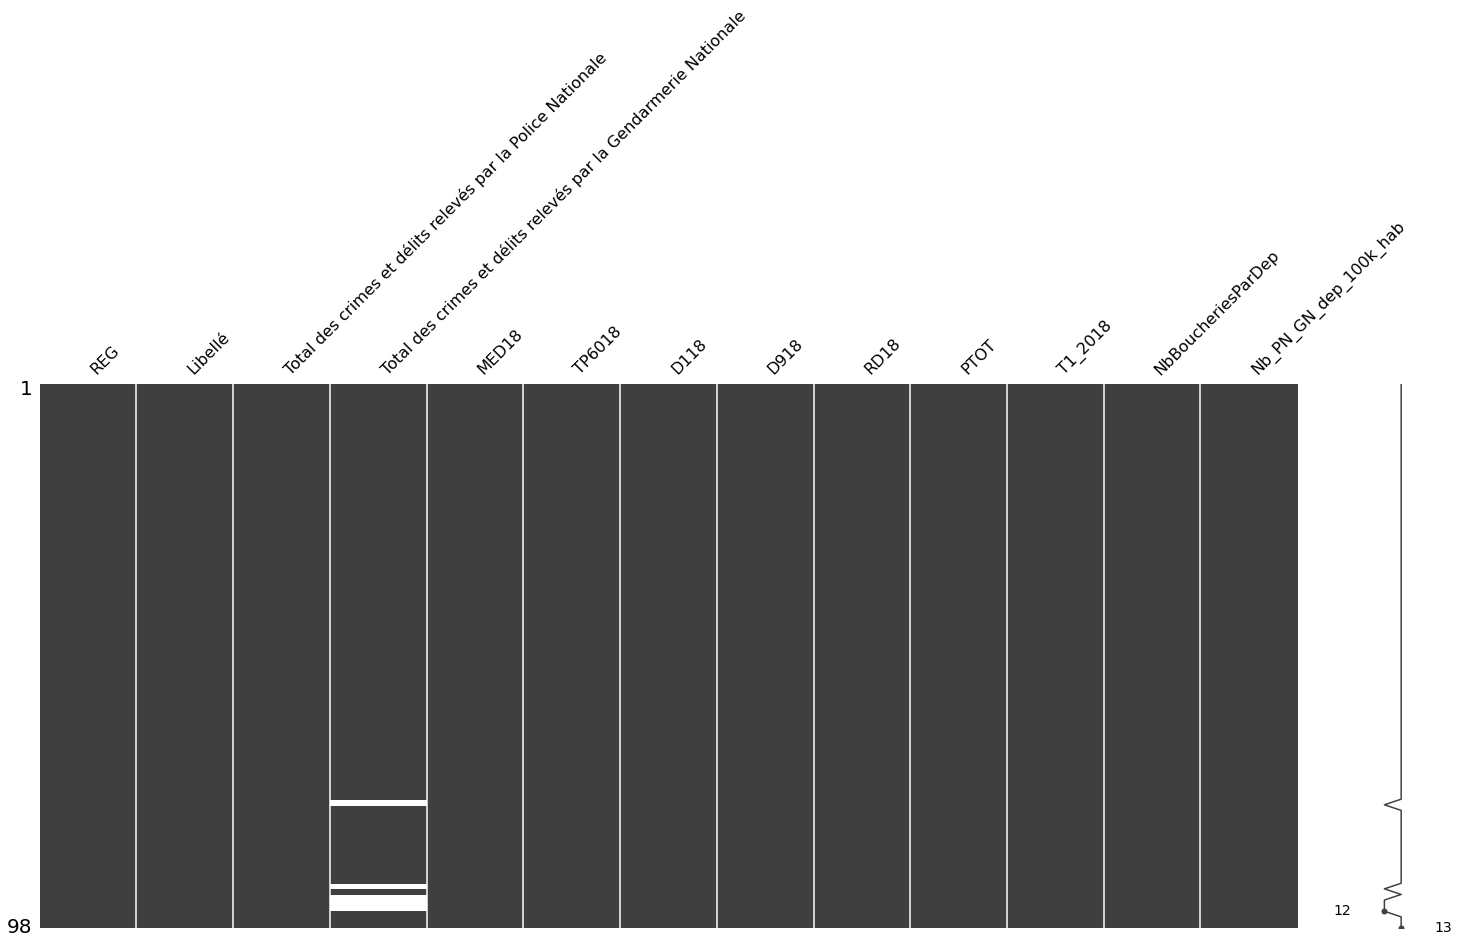

In [40]:
msno.matrix(donnees_2018)

* On se restreint au champ métropolitain car les données d'outre mer ne sont pas exhaustives sur toutes nos sources 

In [32]:
donnees_2018 = donnees_2018[donnees_2018.index.str[:2]!='97']
donnees_2018
donnees_2018.describe()

,Total des crimes et délits relevés par la Police Nationale,Total des crimes et délits relevés par la Gendarmerie Nationale,MED18,TP6018,D118,D918,RD18,PTOT,T1_2018,NbBoucheriesParDep,Nb_PN_GN_dep_100k_hab
count,96.000000,91.000000,96.000000,96.000000,96.000000,96.000000,96.000000,9.600000e+01,96.000000,96.000000,96.000000
mean,25122.489583,12421.692308,21395.416667,14.529167,11669.270833,37039.895833,3.184375,6.881478e+05,8.876042,204.802083,322.291667
std,40884.639166,8185.020096,1672.541663,3.097874,806.946479,5604.855882,0.503948,5.230522e+05,1.745716,168.755046,126.236863
min,552.000000,1580.000000,17740.000000,8.900000,8910.000000,31910.000000,2.500000,8.022700e+04,5.400000,35.000000,160.000000
25%,4765.750000,6305.500000,20415.000000,12.375000,11205.000000,33875.000000,2.900000,3.054255e+05,7.675000,100.250000,250.000000
50%,9984.000000,9883.000000,21010.000000,14.400000,11635.000000,35395.000000,3.050000,5.502715e+05,8.700000,149.500000,300.000000
75%,23510.750000,15543.000000,21907.500000,15.725000,12230.000000,38220.000000,3.325000,8.679185e+05,9.800000,242.500000,362.500000
max,286174.000000,40002.000000,28270.000000,28.400000,13580.000000,68990.000000,6.400000,2.636884e+06,14.300000,868.000000,1170.000000


* On fait l'hypothèse d'unicité du dépôt de plainte ou de signalement en gardarmerie ou bien en commissariat, ce qui permet de sommer les crimes et délits au niveau départemental

In [33]:
donnees_2018['Total des crimes et délits relevés par la PN et GN'] = donnees_2018[['Total des crimes et délits relevés par la Police Nationale', 'Total des crimes et délits relevés par la Gendarmerie Nationale']].sum(axis=1)

/tmp/ipykernel_1059/2960720194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_2018['Total des crimes et délits relevés par la PN et GN'] = donnees_2018[['Total des crimes et délits relevés par la Police Nationale', 'Total des crimes et délits relevés par la Gendarmerie Nationale']].sum(axis=1)


In [34]:
donnees_2018 = donnees_2018.rename(columns={"Total des crimes et délits relevés par la Police Nationale": "Crim_Del_PN", "Total des crimes et délits relevés par la Gendarmerie Nationale": "Crim_Del_GN", "Total des crimes et délits relevés par la PN et GN": "Crim_Del_PN_GN"})
donnees_2018

,REG,Libellé,Crim_Del_PN,Crim_Del_GN,MED18,TP6018,D118,D918,RD18,PTOT,T1_2018,NbBoucheriesParDep,Nb_PN_GN_dep_100k_hab,Crim_Del_PN_GN
01,Auvergne-Rhône-Alpes,AIN,5877,20210.0,23420,10.3,12900,44080,3.4,663720,6.4,212,200.0,26087.0
02,Hauts-de-France,AISNE,12147,13695.0,19690,18.4,10730,33170,3.1,545353,13.0,118,300.0,25842.0
03,Auvergne-Rhône-Alpes,ALLIER,7953,5463.0,20360,15.5,11360,33600,3.0,346156,9.7,105,410.0,13416.0
04,Provence-Alpes-Côte d'Azur,ALPES-DE-HAUTE-PROVENCE,2759,5608.0,20580,16.8,11060,35380,3.2,168613,11.0,77,390.0,8367.0
05,Provence-Alpes-Côte d'Azur,HAUTES-ALPES,2919,3672.0,20880,13.9,11800,35410,3.0,145309,8.6,69,450.0,6591.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Île-de-France,ESSONNE,54085,15525.0,23920,13.1,11880,42180,3.6,1311028,7.3,294,300.0,69610.0
92,Île-de-France,HAUTS-DE-SEINE,110533,NaN,28040,11.9,12220,60580,5.0,1635499,7.0,379,440.0,110533.0
93,Île-de-France,SEINE-SAINT-DENIS,141638,NaN,17740,28.4,8910,33960,3.8,1639416,12.0,588,340.0,141638.0
94,Île-de-France,VAL-DE-MARNE,89604,NaN,22880,16.6,10790,44900,4.2,1405700,8.3,359,380.0,89604.0


## 9 - On créé une base de données rapportant le nombre de crimes et délits, et le nombre de boucheries pour 100 000 habitants 


In [35]:
donnees_2018_hab = donnees_2018
donnees_2018_hab['Nb_Boucherie_dep_hab']=round(donnees_2018_hab['NbBoucheriesParDep']/donnees_2018_hab['PTOT']*100000)
donnees_2018_hab['Crim_Del_GN_hab']=round(donnees_2018_hab['Crim_Del_GN']/donnees_2018_hab['PTOT']*100000)
donnees_2018_hab['Crim_Del_PN_hab']=round(donnees_2018_hab['Crim_Del_PN']/donnees_2018_hab['PTOT']*100000)
donnees_2018_hab['Crim_Del_PN_GN_hab']=round(donnees_2018_hab['Crim_Del_PN_GN']/donnees_2018_hab['PTOT']*100000)
donnees_2018_hab.drop(['Crim_Del_PN', 'Crim_Del_GN', 'PTOT', 'NbBoucheriesParDep'], axis=1, inplace = True)
donnees_2018_hab


,REG,Libellé,MED18,TP6018,D118,D918,RD18,T1_2018,Nb_PN_GN_dep_100k_hab,Crim_Del_PN_GN,Nb_Boucherie_dep_hab,Crim_Del_GN_hab,Crim_Del_PN_hab,Crim_Del_PN_GN_hab
01,Auvergne-Rhône-Alpes,AIN,23420,10.3,12900,44080,3.4,6.4,200.0,26087.0,32.0,3045.0,885.0,3930.0
02,Hauts-de-France,AISNE,19690,18.4,10730,33170,3.1,13.0,300.0,25842.0,22.0,2511.0,2227.0,4739.0
03,Auvergne-Rhône-Alpes,ALLIER,20360,15.5,11360,33600,3.0,9.7,410.0,13416.0,30.0,1578.0,2298.0,3876.0
04,Provence-Alpes-Côte d'Azur,ALPES-DE-HAUTE-PROVENCE,20580,16.8,11060,35380,3.2,11.0,390.0,8367.0,46.0,3326.0,1636.0,4962.0
05,Provence-Alpes-Côte d'Azur,HAUTES-ALPES,20880,13.9,11800,35410,3.0,8.6,450.0,6591.0,47.0,2527.0,2009.0,4536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Île-de-France,ESSONNE,23920,13.1,11880,42180,3.6,7.3,300.0,69610.0,22.0,1184.0,4125.0,5310.0
92,Île-de-France,HAUTS-DE-SEINE,28040,11.9,12220,60580,5.0,7.0,440.0,110533.0,23.0,NaN,6758.0,6758.0
93,Île-de-France,SEINE-SAINT-DENIS,17740,28.4,8910,33960,3.8,12.0,340.0,141638.0,36.0,NaN,8640.0,8640.0
94,Île-de-France,VAL-DE-MARNE,22880,16.6,10790,44900,4.2,8.3,380.0,89604.0,26.0,NaN,6374.0,6374.0


In [36]:
%store donnees_2018
%store donnees_2018_hab

Stored 'donnees_2018' (DataFrame)
Stored 'donnees_2018_hab' (DataFrame)
